PACKAGES

In [1]:
# Importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

GOOGLE DRIVE

In [3]:
# Importing dataframe
Df=pd.read_csv('C:/Users/amade/Desktop/GitHub/Algorithms/Alaska_04102020_PRESIDENTOFTHEUNITEDSTATES.csv' )

DATAFRAME 1

In [4]:
# Data preprocessing
Df.drop(["Contest Id","Tabulator Id","Batch Id","Record Id","Precinct","Precinct Portion"], axis=1, inplace=True)
Df.rename(columns={'rank1': '1', 'rank2': '2', 'rank3': '3', 'rank4': '4', 'rank5': '5'}, inplace=True)
Df.replace({'Joseph R. Biden':'Biden' , 'Amy Klobuchar': 'Klobuchar' , 'Pete Buttigieg': 'Buttigieg' , 'Michael R. Bloomberg': 'Bloomberg' ,  'Undeclared': 'skipped',
            'overvote': 'skipped' , 'Elizabeth Warren': 'Warren' , 'Tom Steyer': 'Steyer' , 'Bernie Sanders': 'Sanders' , 'Tulsi Gabbard': 'Gabbard'}, inplace=True)

In [5]:
# View the top 5 and bottom 5 observations
print(pd.concat([Df.head(), Df.tail()]))

             1          2          3        4        5
0        Biden  Klobuchar  Buttigieg   Steyer   Warren
1        Biden    skipped    skipped  skipped  skipped
2        Biden    skipped    skipped  skipped  skipped
3      Sanders      Biden    skipped  skipped  skipped
4        Biden     Warren    skipped  skipped  skipped
19806  Sanders      Biden     Warren  skipped  skipped
19807    Biden    skipped    skipped  skipped  skipped
19808    Biden    Sanders    skipped  skipped  skipped
19809  Sanders    skipped     Warren   Steyer  Gabbard
19810   Warren    Sanders      Biden  skipped  skipped


In [6]:
# Removing invalid votes
for i in Df.index:                                       # 1 op per n loop + 1 op
  if (all(Df.loc[i,:]=='skipped')):                      # 7 op per n loop  ( [1] Df.loc + [5] 'skipped' comparison + [1] all )
    Df.drop(i, inplace=True)                             # 1 op per n loop
  else:
    serie=Df.loc[i,:]                                    # 2 op per n loop
    serie=serie[~serie.isin(['skipped'])]                # 8 op per n loop  ( [5] 'skipped' comparison + [1] negation + [1] masking + [1] serie variable )
    serie.drop_duplicates(inplace=True)                  # 11 op per n loop ( [4]+[3]+[2]+[1] duplicates comparison + [1] drop duplicates )
    while(len(serie)<5):                                 # 2 op per n loop per 4 loop ( [1] len serie + [1] comparison [for a maximum of 4 times] )
      serie=pd.concat([serie,pd.Series('skipped')])      # 4 op per n loop per 4 loop ( [3] concatenation + [1] serie variable [for a maximum of 4 times] )
    Df.loc[i,:]=list(serie)                              # 3 op per n loop
Df.index=list(range(Df.shape[0]))                        # 5 op

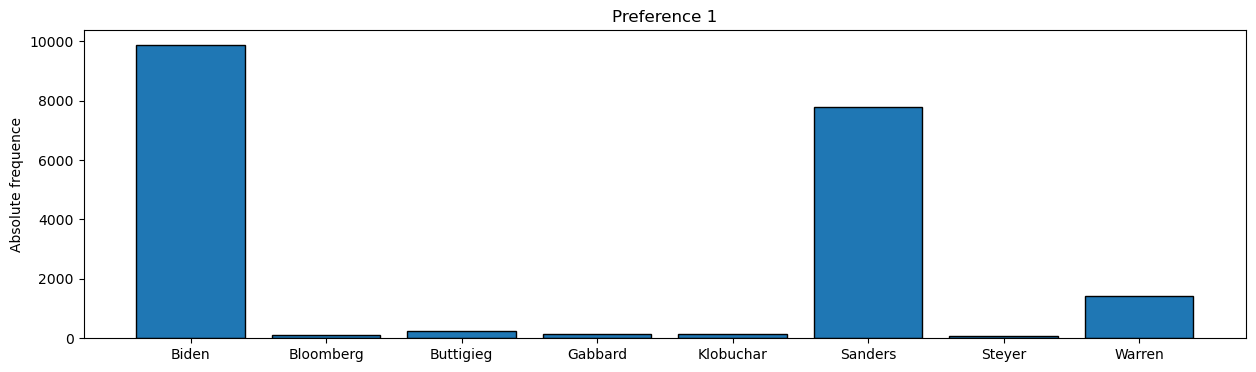

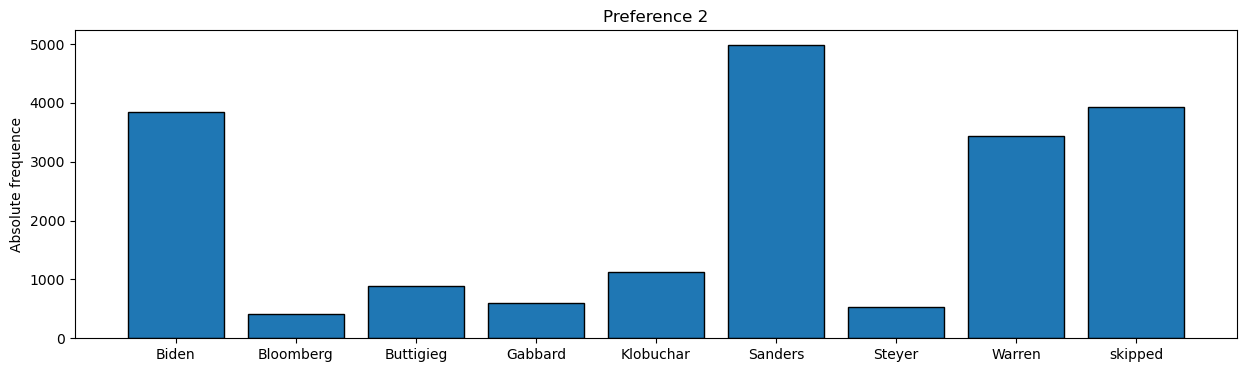

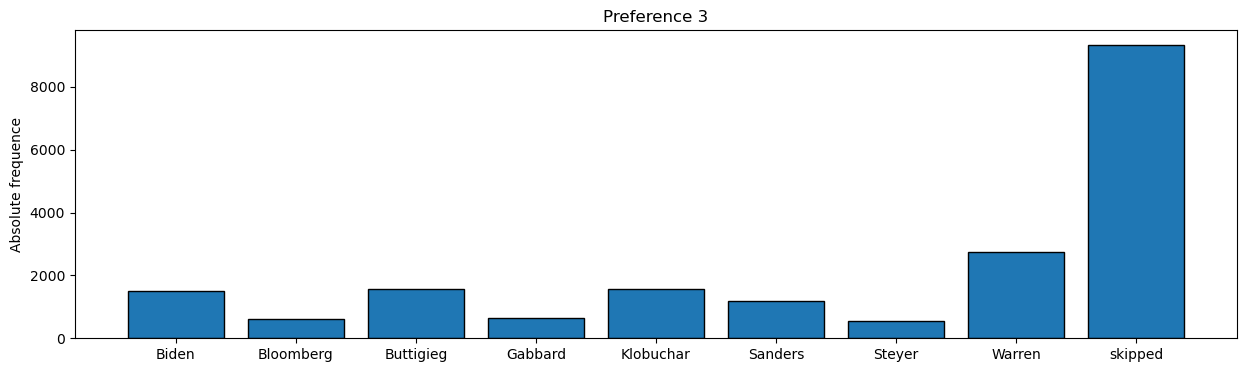

In [7]:
# Preferences histograms
for i in range(1,4):

  # Histogram
  plt.figure(figsize=(15, 4))
  frequence = Df[f'{i}'].value_counts().sort_index()
  plt.bar(frequence.index, frequence.values, align='center', edgecolor='black')

  # Title and labels
  plt.title(f'Preference {i}')
  plt.xlabel('')
  plt.ylabel('Absolute frequence')
  plt.show()

DATAFRAME 2

In [8]:
# Balanced dataframe
Df2=pd.DataFrame({
    '1': np.concatenate([np.full(19,'a'),np.full(12,'b'),np.full(10,'c'),np.full(9,'d'),np.full(5,'e')]),
    '2': np.concatenate([np.full(19,'d'),np.full(12,'e'),np.full(10,'b'),np.full(9,'c'),np.full(4,'b'),np.full(1,'c')]),
    '3': np.concatenate([np.full(19,'e'),np.full(12,'d'),np.full(19,'e'),np.full(4,'c'),np.full(1,'b')]),
    '4': np.concatenate([np.full(31,'c'),np.full(10,'d'),np.full(9,'b'),np.full(4,'d'),np.full(1,'a')]),
    '5': np.concatenate([np.full(19,'b'),np.full(35,'a'),np.full(1,'d')])})

In [9]:
# View the top 5 and bottom 5 observations
print(pd.concat([Df2.head(), Df2.tail()]))

    1  2  3  4  5
0   a  d  e  c  b
1   a  d  e  c  b
2   a  d  e  c  b
3   a  d  e  c  b
4   a  d  e  c  b
50  e  b  c  d  a
51  e  b  c  d  a
52  e  b  c  d  a
53  e  b  c  d  a
54  e  c  b  a  d


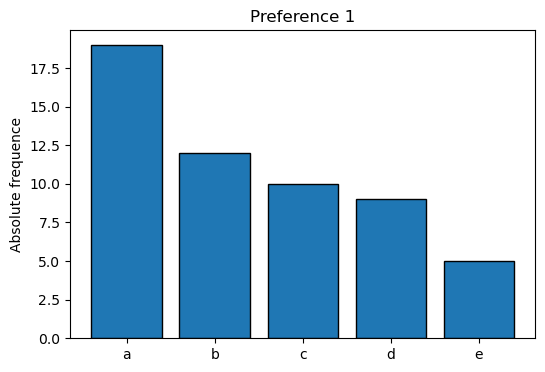

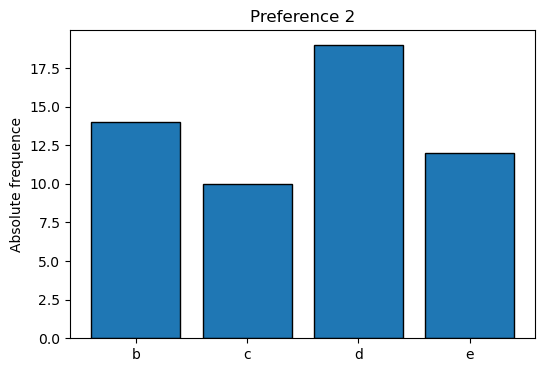

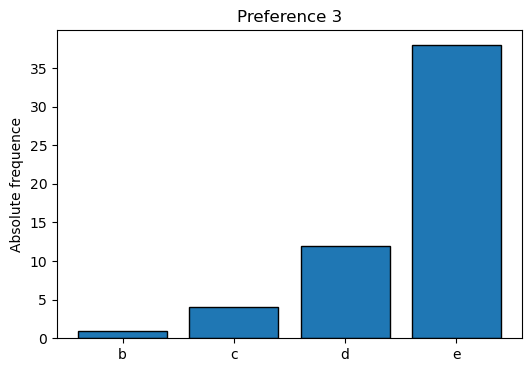

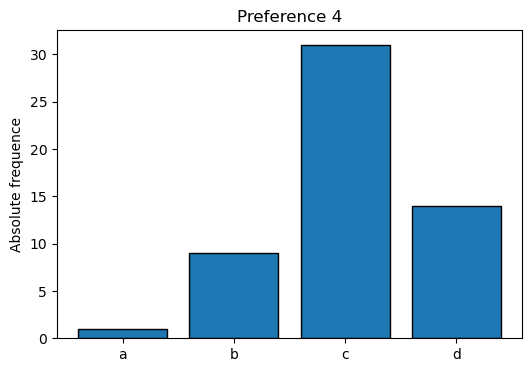

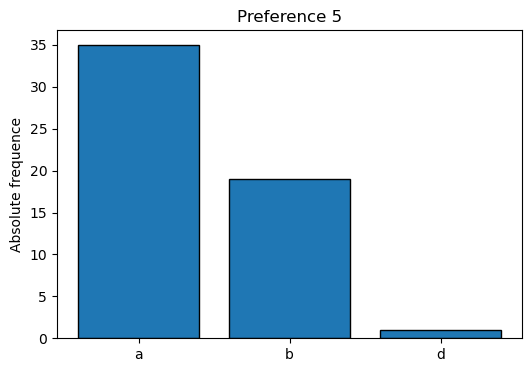

In [10]:
# Preferences histograms
for i in range(1,6):

  # Histogram
  plt.figure(figsize=(6, 4))
  frequence = Df2[f'{i}'].value_counts().sort_index()
  plt.bar(frequence.index, frequence.values, align='center', edgecolor='black')

  # Title and labels
  plt.title(f'Preference {i}')
  plt.xlabel('')
  plt.ylabel('Absolute frequence')
  plt.show()

PREPARATORY FUNCTIONS

In [11]:
# Find candidates
def FindCandidates(Dataframe):
  Candidates=list(pd.unique(Dataframe.values.flatten()))    # 5n+3 op ( [1] flatten values + [5*n] unique values + [1] list + [1] Candidates variable )
  if 'skipped' in Candidates:                               # k+1 op
    Candidates.remove('skipped')                            # 1 op
  return(Candidates)                                        # 1 op

In [12]:
# Dataframe initialization
def BuildDf(CandidatesList):
  matrix=np.zeros((len(CandidatesList), len(CandidatesList)))            # k*k+3 op
  df=pd.DataFrame(matrix, columns=CandidatesList, index=CandidatesList)  # 4 op
  return(df)                                                             # 1 op

In [13]:
# Preferences matrix
def PreferencesMatrix(Dataframe):

  # Matrix initialization
  Candidates=FindCandidates(Dataframe)         # 5n+k+6 op
  df=BuildDf(Candidates)                       # k*k+8 op

  # Matrix filler
  for i in range(Dataframe.shape[0]):          # 1 op per n loop + 2 op
    Worst=set(Candidates)                      # 2 op per n loop
    for j in range(1,Dataframe.shape[1]+1):    # 1 op per n loop per 5 loop + 3 op per n loop
      C=Dataframe.at[i,f'{j}']                 # 3 op per n loop per 5 loop
      if (C=='skipped'): break                 # 2 op per n loop per 5 loop
      Worst.remove(C)                          # 1 op per n loop per 5 loop
      for l in Worst:                          # 1 op per n loop per 5 loop per k loop
        df.at[C,l]+=1                          # 3 op per n loop per 5 loop per k loop

  # Sorting matrix
  df.sort_index(axis=0, inplace=True)          # k*log(k) op
  df.sort_index(axis=1, inplace=True)          # k*log(k) op

  return(df.astype(int))                       # k*k op

In [14]:
# Print preferences matrix of Df2
print(PreferencesMatrix(Df2))

    a   b   c   d   e
a   0  19  19  20  19
b  36   0  16  27  22
c  36  39   0  15  19
d  35  28  40   0  28
e  36  33  36  27   0


In [15]:
# Strongest paths
def StrongestPaths(DistancesMatrix):

  # Paths initialization
  Candidates=DistancesMatrix.columns                                       # 2 op
  p=BuildDf(Candidates)                                                    # k*k+8 op

  # Paths filler
  for i in Candidates:                                                     # 1 op per k loop
    for j in Candidates:                                                   # 1 op per k loop per k loop
        if (i!=j):                                                         # 1 op per k loop per k loop
            if (DistancesMatrix.at[i,j] > DistancesMatrix.at[j,i]):        # 3 op per k loop per k loop
                p.at[i,j]=DistancesMatrix.at[i,j]                          # 3 op per k loop per k loop
            else:
                p.at[i,j]=0                                                # 2 op per k loop per k loop

  for i in Candidates:                                                     # 1 op per k loop
    for j in Candidates:                                                   # 1 op per k loop per k loop
        if (i!=j):                                                         # 1 op per k loop per k loop
            for k in Candidates:                                           # 1 op per k loop per k loop per k loop
                if (i!=k) and (j!=k):                                      # 3 op per k loop per k loop per k loop
                    p.at[j,k]=max(p.at[j,k], min(p.at[j,i], p.at[i,k]))    # 7 op per k loop per k loop per k loop ( [3] min value + [2] max value + [2] p.at variable )

  return(p.astype(int))                                                    # k*k op

In [16]:
print(StrongestPaths(PreferencesMatrix(Df2)))

    a   b   c  d   e
a   0   0   0  0   0
b  36   0   0  0   0
c  36  39   0  0   0
d  36  39  40  0  28
e  36  36  36  0   0


In [17]:
# Frequency vote
def FrequencyVote(Dataframe):

  # Matrix initialization
  CountMatrix=Dataframe.groupby(list(Dataframe.columns)).size().reset_index(name='Count')
  Candidates=FindCandidates(Dataframe)
  matrix=np.zeros((len(Candidates)+1, 1))
  index=Candidates+list(['COUNT'])
  FrequencyVote=pd.DataFrame(matrix, columns=[''], index=index)

  # Matrix filler
  for i in range(CountMatrix.shape[0]):
    Values=[int(x) for x in CountMatrix.iloc[i,:][0:-1].index]+list([CountMatrix.iloc[i,-1]])
    Index=list(CountMatrix.iloc[i,:][0:-1])+list(['COUNT'])
    serie=pd.Series(Values, index=Index, name=f'{i+1}')
    if 'skipped' in serie.index:
      serie=serie.drop('skipped')
    FrequencyVote=pd.concat([FrequencyVote,serie],axis=1)

  # Sorting matrix
  FrequencyVote.drop('', axis=1, inplace=True)
  FrequencyVote.fillna(len(Candidates), inplace=True)

  return(FrequencyVote.astype(int))

In [18]:
# Print frequency of votes of Df2
print(FrequencyVote(Df2))

        1   2   3  4  5  6
a       1   5   5  5  5  4
d       2   3   4  1  4  5
e       3   2   3  3  1  1
c       4   4   1  2  3  2
b       5   1   2  4  2  3
COUNT  19  12  10  9  4  1


VOTING METHODS

In [19]:
# Schulze method function
def SchulzeMethod(Dataframe):

  # PreferencesMatrix function call
  DistancesMatrix=PreferencesMatrix(Dataframe)
  # StrongestPaths function call
  Path=StrongestPaths(DistancesMatrix)

  # For loop on candidates
  for i in Path.columns:
      # Comparison of row vs column for the candidate
      Compare=(Path.loc[i,:]>=Path.loc[:,i])
      # If statement that check the Schulze condition
      if (all(Compare)):
        # Winning candidate return
        return(i)

In [20]:
#  Borda method function
def BordaMethod(Dataframe):

  # FrequencyVote function call
  Frequency=FrequencyVote(Dataframe)
  # Score initialization
  Frequency['Score']=np.zeros(Frequency.shape[0])

  # For loop on candidates
  for i in Frequency.index[0:-1]:
    # Products between positions and number of votes
    Frequency.loc[i,'Score']= np.dot(Frequency.loc[i,:][0:-1], Frequency.loc['COUNT',:][0:-1])

  # Borda winner return
  return(Frequency['Score'][0:-1].idxmin())

In [21]:
# Plurality function
def Plurality(Dataframe):

  # FrequencyVote function call
  Frequency=FrequencyVote(Dataframe)
  # Score initialization
  Frequency['Score']=np.zeros(Frequency.shape[0])

  # For loop on candidates
  for i in Frequency.index[0:-1]:
    # For loop on different votes
    for j in Frequency.columns:
      # Check on position 1
      if (Frequency.at[i,j]==1):
        # Score update
        Frequency.at[i,'Score']+=Frequency.at['COUNT',j]

  # Plurality winner return
  return(Frequency['Score'].idxmax())

In [22]:
# Instant runoff
def IRV(Dataframe):

  # FrequencyVote function call
  Frequency=FrequencyVote(Dataframe)

  # While loop
  while (Frequency.shape[0]>2):

    # Score initialization
    Frequency['Score']=np.zeros(Frequency.shape[0])

    # For loop on candidates
    for i in Frequency.index[0:-1]:
      # For loop on different votes
      for j in Frequency.columns:
        # Check on position 1
        if (Frequency.at[i,j]==1):
          # Score update
          Frequency.at[i,'Score']+=Frequency.at['COUNT',j]

    # Last candidate is eliminated
    Eliminated=Frequency['Score'][0:-1].idxmin()

    # For loop on candidates
    for i in Frequency.index[0:-1]:
      # For loop on different votes
      for j in Frequency.columns[0:-1]:
        # Votes updating
        if (Frequency.at[i,j]>Frequency.at[Eliminated,j]):
          Frequency.at[i,j]-=1

    # Drop eliminated candidate row
    Frequency=Frequency.drop(Eliminated)

  # IRV winner return
  return(Frequency.index[0])

TEST

In [25]:
# Schulze method test
start_time = time.time()
print(" \nAccording to Schulze method the winner is " + SchulzeMethod(Df))
end_time = time.time()
print("Schulze time:", round(end_time-start_time,2), "seconds")

# Borda method test
start_time = time.time()
print(" \nAccording to Borda method the winner is " + BordaMethod(Df))
end_time = time.time()
print("Borda time:", round(end_time-start_time,2), "seconds")

# Plurality method test
start_time = time.time()
print(" \nAccording to plurality method the winner is " + Plurality(Df))
end_time = time.time()
print("Plurality time:", round(end_time-start_time,2), "seconds")

# Instant runoff test
start_time = time.time()
print(" \nAccording to instant runoff method the winner is " + IRV(Df))
end_time = time.time()
print("Instant runoff time:", round(end_time-start_time,2), "seconds")

 
According to Schulze method the winner is Biden
Schulze time: 12.43 seconds
 
According to Borda method the winner is Biden
Borda time: 20.7 seconds
 
According to plurality method the winner is Biden
Plurality time: 20.58 seconds
 
According to instant runoff method the winner is Biden
Instant runoff time: 24.58 seconds


In [26]:
# Schulze method test
start_time = time.time()
print(" \nAccording to Schulze method the winner is " + SchulzeMethod(Df2))
end_time = time.time()
print("Schulze time:", round(end_time-start_time,2), "seconds")

# Borda method test
start_time = time.time()
print(" \nAccording to Borda method the winner is " + BordaMethod(Df2))
end_time = time.time()
print("Borda time:", round(end_time-start_time,2), "seconds")

# Plurality method test
start_time = time.time()
print(" \nAccording to plurality method the winner is " + Plurality(Df2))
end_time = time.time()
print("Plurality time:", round(end_time-start_time,2), "seconds")

# Instant runoff test
start_time = time.time()
print(" \nAccording to instant runoff method the winner is " + IRV(Df2))
end_time = time.time()
print("Instant runoff time:", round(end_time-start_time,2), "seconds")

 
According to Schulze method the winner is d
Schulze time: 0.04 seconds
 
According to Borda method the winner is e
Borda time: 0.01 seconds
 
According to plurality method the winner is a
Plurality time: 0.01 seconds
 
According to instant runoff method the winner is c
Instant runoff time: 0.02 seconds
